In [1]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('2.01.+Admittance.csv')
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


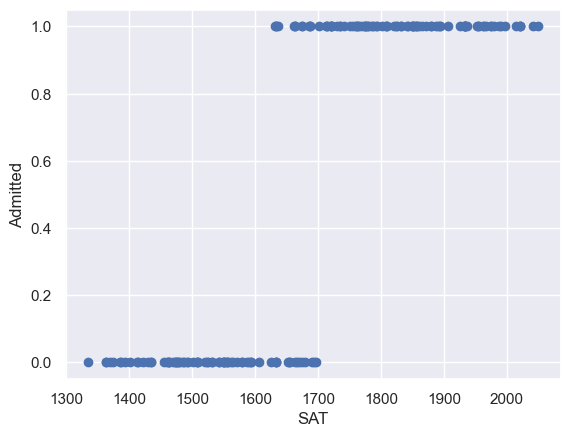

In [3]:
x1 = data['SAT']
y = data['Admitted']
plt.scatter(x1,y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [4]:
def showBiasAndWeight(modelFitValue):
    return result.summary().tables[1]

def getYHat(results):
    # '''take the result of an statsmodel results table and transforms it into a dataframe'''
    # pvals = results.pvalues
    coeff = results.params
    # conf_lower = results.conf_int()[0]
    # conf_higher = results.conf_int()[1]

    results_df = pd.DataFrame({
        # "pvals":pvals,
                               "coeff":coeff,
                               # "conf_lower":conf_lower,
                               # "conf_higher":conf_higher
                                })

    #Reordering...
    # results_df = results_df[["coeff","pvals","conf_lower","conf_higher"]]
    # y_hat = 0
    
    return results_df

In [5]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
# y_hat_base =getYHat(result);
# y_hat = 0 
# for i in  y_hat_base.index:
#     print(i) 



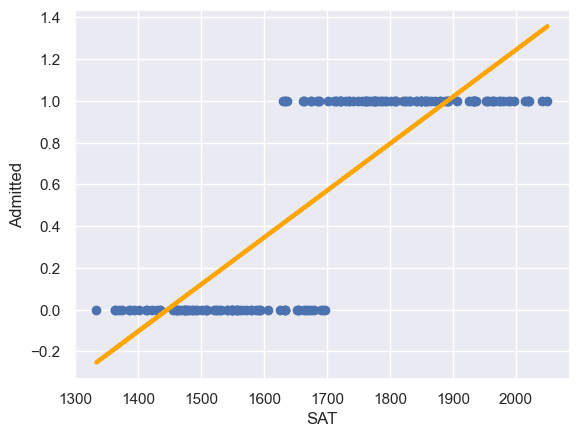

In [6]:
#below code will work as y_hat = -3.2519+ x1 * 0.0022
y_hat = result.predict(x)
plt.scatter(x1,y)
plt.plot(x1,y_hat,lw=3,c="orange")
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [9]:
# Add a constant to the array for the intercept term
X = sm.add_constant(x1)

# Fit the model
reg_model = sm.Logit(y, X)
result = reg_model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.7992
Time:                        18:25:12   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
plt.scatter(x1,y)
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))
    
x_sorted = np.sort(x1)
f_sorted = np.sort(f(x1,result.params[0],result.params[1]))

plt.plot(x_sorted,f_sorted,lw=3,c="orange")

plt.xlabel('X')
plt.ylabel('y')
plt.title('Logistic Regression Curve')
plt.show()